<a href="https://colab.research.google.com/github/TeinkBR/1D_harmonic_oscillator/blob/main/Fit_Plot_Fraunhofer_WSwitch_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

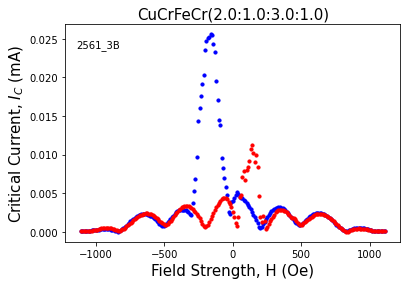

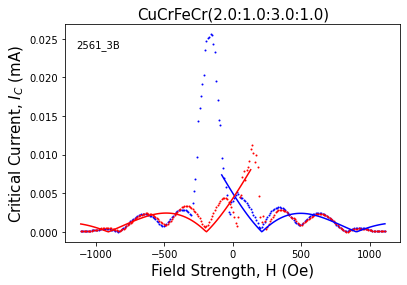

In [ ]:
"""
Input: QD Data for samples with fraunhofers that show field switch
Output: Fraunhofer, Fitted Fraunhofer, Fit Parameters File

Last edited on October 5, 2020 by Swapna Sindhu Mishra
"""

folderpath = '/Users/jingyili/Downloads/H_vs_Ic/2561_3B' #File Location?
title = 'CuCrFeCr(2.0:1.0:3.0:1.0)'
sample='2561_3B' #File name?
QD=1 #Which QD is being used?
downswitch=-89.581 #downswitch field value
upswitch=141.43400000 #upswitch field value

import numpy as np
import matplotlib.pyplot as plt
import os
import scipy
from scipy import optimize
os.chdir(folderpath) 
downsweep = f'{sample}_Down_without_header.dat'
upsweep = f'{sample}_Up_without_header.dat'
downdata = np.loadtxt(downsweep)
updata = np.loadtxt(upsweep)
down_Ic_max=max(downdata[:,2])
up_Ic_max=max(updata[:,2])

if QD<3: #For conversion from Yixings
    down_Rn=5*9.461*downdata[1,3]*1.0006*10**(-6) 
    up_Rn=5*9.461*updata[1,3]*1.0006*10**(-6)
else:    #For room temperature system
    down_Rn=downdata[1,3]*10**(3) 
    up_Rn=updata[1,3]*10**(3)

down_IcRn=round(down_Ic_max*down_Rn, 1)
up_IcRn=round(up_Ic_max*up_Rn, 1)

plt.scatter(downdata[:,0],downdata[:,2], s=10, color='b', label=f'$I_C R_N$ = {down_IcRn} $\mu V$ $\downarrow$')
plt.scatter(updata[:,0],updata[:,2], s=10, color='r', label=f'$I_C R_N$ = {up_IcRn} $\mu V$')
#plt.plot(downdata[:,0],downdata[:,2], color='b', label=f'$I_C R_N$ = {down_IcRn} $\mu V$ $\downarrow$')
#plt.plot(updata[:,0],updata[:,2], color='r', label=f'$I_C R_N$ = {up_IcRn} $\mu V$')
#plt.xlim([-25, 25])
plt.title(title, fontsize=15)
plt.figtext(.15, .8, f'{sample}')
plt.ylabel('Critical Current, $I_C$ (mA)', fontsize=15)
plt.xlabel('Field Strength, H (Oe)', fontsize=15)
#plt.legend(loc='best', fontsize=10.5)
plt.savefig(f'{sample}.svg', bbox_inches='tight')
plt.savefig(f'{sample}.png', bbox_inches='tight', dpi=300)
plt.show()

"""
#Look for a sudden discontinuity in the data, assume switch is there
manual=1
if manual<1:
    downswitch=np.argmax(abs(np.ediff1d(downdata[:,2])))
    upswitch=np.argmax(abs(np.ediff1d(updata[:,2])))
else:
    downswitch=0
    upswitch=50
print(f'The switch in Downsweep is at {downswitch} Oe and Upswitch is at {upswitch} Oe')
"""

downH=downdata[:,0]
downrangeH=downH[downH > downswitch]
ppp= len(downH)-len(downrangeH)
downrangeIc=downdata[ppp:,2]
upH=updata[:,0]
uprangeH=upH[upH < upswitch]
uprangeIc=updata[:len(uprangeH),2]


def fit_func_4(x,k,m,ic):
    return 2*ic*abs(scipy.special.jv(1,k*(x+m))/(k*(x+m)))
                                     
downparams,downparams_covariance=optimize.curve_fit(fit_func_4,downrangeH,downrangeIc,p0=[-0.03, 50, 0.01])
upparams,upparams_covariance=optimize.curve_fit(fit_func_4,uprangeH,uprangeIc,p0=[-0.03,-50,0.01])

fit_file=open(f'{sample}_Airy_Fit_Parameters.dat', 'w')
fit_file.write(f'Down_Switch = {downswitch}\n')
fit_file.write(f'Down_k = {str(downparams[0])} +- {str(np.sqrt(np.diag(downparams_covariance))[0])} \n')
fit_file.write(f'Down_m = {str(downparams[1])} +- {str(np.sqrt(np.diag(downparams_covariance))[1])} \n')
fit_file.write(f'Down_Ic = {str(downparams[2])} +- {str(np.sqrt(np.diag(downparams_covariance))[2])} \n')
fit_file.write(f'Down_IcRn = {str(downparams[2]*down_Rn)} +- {str(np.sqrt(np.diag(downparams_covariance))[2]*down_Rn)}\n\n')

fit_file.write(f'Up_Switch = {upswitch}\n')
fit_file.write(f'Up_k = {str(upparams[0])} +- {str(np.sqrt(np.diag(upparams_covariance))[0])} \n')
fit_file.write(f'Up_m = {str(upparams[1])} +- {str(np.sqrt(np.diag(upparams_covariance))[1])} \n')
fit_file.write(f'Up_Ic = {str(upparams[2])} +- {str(np.sqrt(np.diag(upparams_covariance))[2])} \n')
fit_file.write(f'Up_IcRn = {str(upparams[2]*up_Rn)} +- {str(np.sqrt(np.diag(upparams_covariance))[2]*up_Rn)}')
fit_file.close()

downfit_IcRn=round(downparams[2]*down_Rn, 1)
upfit_IcRn=round(upparams[2]*up_Rn, 1)

plt.title(title, fontsize=15)
plt.figtext(.15, .8, f'{sample}')
plt.ylabel('Critical Current, $I_C$ (mA)', fontsize=15)
plt.xlabel('Field Strength, H (Oe)', fontsize=15)
plt.scatter(downdata[:,0],downdata[:,2], s=1, color='b' )
plt.scatter(updata[:,0],updata[:,2], s=1, color='r')
plt.plot(downrangeH,fit_func_4(downrangeH,-downparams[0],downparams[1],downparams[2]),color='b', label=f'$I_C R_N$ = {downfit_IcRn} $\mu V$ $\downarrow$')
plt.plot(uprangeH,fit_func_4(uprangeH,upparams[0],upparams[1],upparams[2]), color='r', label=f'$I_C R_N$ = {upfit_IcRn} $\mu V$')
#plt.legend(loc='best', fontsize=10.5)
plt.savefig(f'{sample}_Airy_Fit.svg', bbox_inches='tight')
plt.savefig(f'{sample}_Airy_Fit.png', bbox_inches='tight', dpi=300)
plt.show()